# Conversion Report

step through each example

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import sys

try:
    import jose
except ModuleNotFoundError:
    print('jose not in PYTHONPATH, needs to be added')
    print('Attempting to add temporarily to demonstrate example functionality')
    sys.path.insert(1, os.path.join(os.getcwd(), 'PyJose'))
    import jose
    
from astropy.io import fits as pyfits

imageDir = os.path.join(os.getcwd(), 'PyJose', 'images')
dataDir = os.path.join(os.getcwd(), 'PyJose', 'data')
example1Dir = os.path.join(dataDir, 'example1')

jose not in PYTHONPATH, needs to be added
Attempting to add temporarily to demonstrate example functionality


In [2]:
# set up example 1
frame1 = pyfits.open(os.path.join(imageDir, 'ex1.fits'))[0]
Q = frame1.header.get('EPADU')
rn = frame1.header.get('RDNOISE') / Q
leftBound = 240
rightBound = 270
variance_image = np.abs(frame1.data) / Q + rn**2

### Polynomial Fitting

In [3]:
loadData = lambda filename: np.loadtxt('PyJose/data/procvect/' + filename + '.csv', delimiter=',')
idl_fittedData = loadData('bgRow')
data = loadData('datav')

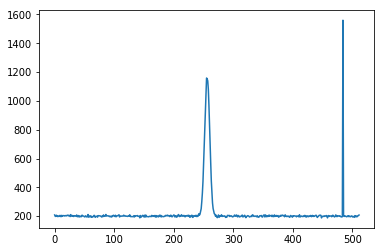

In [4]:
plt.plot(data)

### Background Fitting Comparison

In [5]:
background = jose.fit_background(frame1.data, (leftBound, rightBound), variance_image)

In [6]:
idl_background = np.loadtxt(os.path.join('PyJose/data/example1', 'bgim.csv'), delimiter=',')
difference_background = background - idl_background

Text(0.5,1,'Differences')

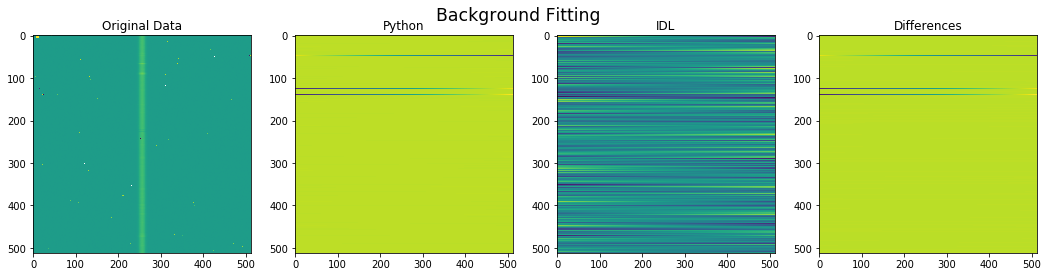

In [7]:
f, ax = plt.subplots(1,4, figsize=(18,4))

f.suptitle("Background Fitting", size='xx-large')

ax[0].imshow(frame1.data, norm=LogNorm())
ax[0].set_title('Original Data')
ax[1].imshow(background)
ax[1].set_title('Python')
ax[2].imshow(idl_background)
ax[2].set_title('IDL')
ax[3].imshow(difference_background)
ax[3].set_title('Differences')

In [8]:
difference_background

array([[-0.18057569, -0.18056922, -0.18055276, ..., -0.17717467,
        -0.1771782 , -0.17717174],
       [-0.17064444, -0.17082924, -0.17100405, ..., -0.26343027,
        -0.26360508, -0.26378988],
       [-0.16926261, -0.16935407, -0.16945554, ..., -0.21937678,
        -0.21945825, -0.21955971],
       ..., 
       [-0.19095164, -0.19087422, -0.1907868 , ..., -0.14889561,
        -0.14880819, -0.14872077],
       [ 0.01551666,  0.01552229,  0.01552792, ...,  0.02145275,
         0.02146838,  0.02148401],
       [-0.14359695, -0.14376637, -0.14393578, ..., -0.22624795,
        -0.22641736, -0.22657677]])

In [11]:
np.max(difference_background)

25.903690947170588

In [12]:
np.min(difference_background)

-230.25119758898549

In [13]:
np.argmin(difference_background)

49152

In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [22]:
np.min(background)


-30.682597588985487

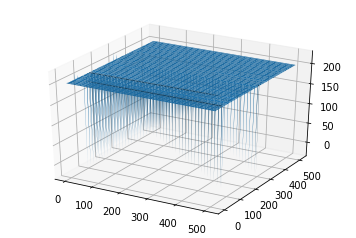

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.array(range(background.shape[0]))
Y = np.array(range(background.shape[1]))
X, Y = np.meshgrid(X, Y)

ax.plot_surface(X, Y, background)